<a href="https://colab.research.google.com/github/agulhane090398/PythonViz/blob/main/Naive_Bayes_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Health Outcomes of Horses with Machine Learning

### Context

Welcome to the **Scaler Health Analytics** team! Our objective is to leverage advanced analytics to predict health outcomes in horses, enabling veterinarians to make more informed decisions that can improve treatment strategies and overall horse health management. Utilizing machine learning techniques, particularly classification algorithms, you will analyze clinical data from horses to predict various health outcomes.

### Dataset Description

You have been provided with a comprehensive dataset containing clinical records of horses treated in a veterinary hospital. The data encapsulates a variety of clinical attributes that offer insights into the general health and medical condition of each horse. Each record in the dataset is described by the following features:

### Clinical Attributes:
- **id:** Unique identifier for each horse.
- **surgery:** Whether the horse had surgery (Yes/No).
- **age:** Age of the horse.
- **hospital_number:** Unique number assigned to the horse at the hospital.
- **rectal_temp:** Rectal temperature of the horse.
- **pulse:** Pulse rate in beats per minute.
- **respiratory_rate:** Respiratory rate in breaths per minute.
- **temp_of_extremities:** Temperature of extremities (a possible indicator of shock).
- **peripheral_pulse:** Quality of the peripheral pulse.
- **mucous_membrane:** Color of the mucous membranes, which can indicate blood circulation quality.
- **capillary_refill_time:** Time taken for color to return to mucous membrane after pressure is applied.
- **pain:** Horse's pain level (graded).
- **peristalsis:** Intestinal activity observed.
- **abdominal_distention:** Any distention of the abdomen.
- **nasogastric_tube:** Whether a nasogastric tube has been placed.
- **nasogastric_reflux:** Any nasogastric reflux noted.
- **nasogastric_reflux_ph:** pH of the nasogastric reflux.
- **rectal_exam_feces:** Findings of the rectal examination of feces.
- **abdomen:** Detailed examination findings of the abdomen.
- **packed_cell_volume:** Packed cell volume, indicating hydration status and blood loss.
- **total_protein:** Total protein levels in blood.
- **abdomo_appearance:** Appearance of abdominal fluid.
- **abdomo_protein:** Protein level in abdominal fluid.
- **surgical_lesion:** Presence of surgical lesions.
- **lesion_1, lesion_2, lesion_3:** Type and location of lesions identified.
- **cp_data:** Clinical pathology data.
- **outcome:** Health outcome of the horse (e.g., recovered, euthanized, died).

Your task is to use machine learning models to predict the 'outcome' for each horse and identify key predictors of health outcomes. This project will contribute significantly to improving the predictive models used in veterinary practices.

In [1]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/101/original/health_outcome_dataset.csv

--2025-07-14 03:20:58--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/101/original/health_outcome_dataset.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.183, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229201 (224K) [text/plain]
Saving to: ‘health_outcome_dataset.csv’

health_outcome_data 100%[===================>] 223.83K  --.-KB/s    in 0.05s   

2025-07-14 03:20:58 (4.79 MB/s) - ‘health_outcome_dataset.csv’ saved [229201/229201]



In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

df = pd.read_csv("health_outcome_dataset.csv")
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
df.isna().sum()

,0
id,0
surgery,0
age,0
hospital_number,0
rectal_temp,0
pulse,0
respiratory_rate,0
temp_of_extremities,39
peripheral_pulse,60
mucous_membrane,21


In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer

df.drop('lesion_3', inplace = True, axis = 1)

# Create imputer objects
num_imputer = SimpleImputer(strategy='median')  # Imputer for numerical data
cat_imputer = SimpleImputer(strategy='most_frequent')  # Imputer for categorical data

# Define columns by type
num_cols = ['rectal_temp', 'pulse', 'respiratory_rate']  # Numerical columns
cat_cols = ['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time',
            'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube',
            'nasogastric_reflux', 'abdomen', 'abdomo_appearance', 'rectal_exam_feces']  # Categorical columns

# Apply imputation
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [6]:
df['outcome'].value_counts()

,count
outcome,
lived,574
died,410
euthanized,251




---
# Assesments for Naive Bayes-I




---



### Pulse Rate Distribution

#### Context:
Analyzing the pulse rate distribution among horses with different health outcomes can provide critical insights into physiological states associated with various health conditions. This analysis can help veterinarians understand how pulse rate might correlate with the severity or type of condition a horse is facing.

#### Task:
Create a visual representation to analyze the pulse rate distribution across different health outcomes using the 'pulse' and 'outcome' columns in the dataset.

#### Instructions:
1. **Group and Count Data:** Use the dataset to group entries by 'outcome' and calculate the average 'pulse' for each outcome category.
2. **Visualize Data:** Generate a box plot to display the distribution of pulse rates for each health outcome category. This will help in visually comparing the pulse rate variability associated with different outcomes.
3. **Analyze Trends:** Examine the box plot to determine which health outcome is associated with the highest average pulse rate and which shows the most variability in pulse rates.

#### Question:
After analyzing the box plot representing the pulse rate distribution for different health outcomes, identify the correct statements regarding pulse rates.

#### Options:
A) The average pulse rate is highest among horses that lived, indicating recovery from potentially distressing conditions.

B) The average pulse rate is lowest for horses that were euthanized, suggesting less physiological distress before euthanasia.

C) The average pulse rate is highest among horses that died, suggesting a correlation between high pulse rates and critical health conditions leading to death.

D) The box plot shows no significant difference in the average pulse rates across different health outcomes.

Average Pulse Rate by Outcome:
outcome
died          90.207317
euthanized    86.573705
lived         68.918118
Name: pulse, dtype: float64


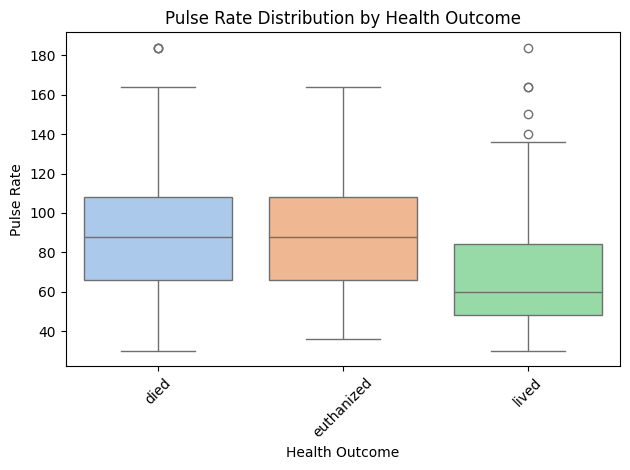

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the dataframe by 'outcome' and calculate the average 'pulse' for each outcome category.
# This line calculates the mean pulse, but is not directly used for the boxplot
pulse_outcome_data = df.groupby("outcome")['pulse'].mean()
print("Average Pulse Rate by Outcome:")
print(pulse_outcome_data)

# Set a custom color palette (optional)
custom_palette = sns.color_palette("pastel")

# Utilize seaborn to create a box plot that shows variation within grouped data.
# Use the original dataframe 'df' and specify the columns for x and y axes
sns.boxplot(x='outcome', y='pulse', data=df, palette=custom_palette)
plt.title('Pulse Rate Distribution by Health Outcome')
plt.xlabel('Health Outcome')
plt.ylabel('Pulse Rate')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()



---

### Rectal Temperature Correlation

#### Context:
Understanding how rectal temperature correlates with health outcomes in horses can provide valuable insights for veterinary treatment strategies. Rectal temperature is a critical clinical parameter and its deviations from the norm can indicate various health conditions.

#### Task:
Analyze the impact of different rectal temperature categories on health outcomes. The rectal temperatures will be categorized into hypothermia, normal, and fever to observe how these conditions correlate with health outcomes.

#### Instructions:
1. **Create Temperature Categories:** Add a new column to the dataset, 'temp_category', which categorizes rectal temperature into hypothermia (<37.5°C), normal (37.5-38.5°C), and fever (>38.5°C).
2. **Group Data by Temperature Category:** Group the dataset by 'temp_category' and 'outcome' to analyze the distribution of health outcomes within each temperature category.
3. **Visualize and Analyze Data:** Create a bar chart to visualize the count of each health outcome within the different temperature categories. This will help identify any significant correlations between rectal temperature and health outcomes.

#### Question:
After analyzing the bar chart which depicts the count of health outcomes within each rectal temperature category, identify the correct statement regarding the correlation between rectal temperature categories and health outcomes.

#### Options:
A) Horses with fever have the highest survival rate.

B) Normal rectal temperature is associated with the best health outcomes.

C) Horses with hypothermia are more likely to be euthanized.

D) There is no significant relationship between rectal temperature categories and health outcomes.


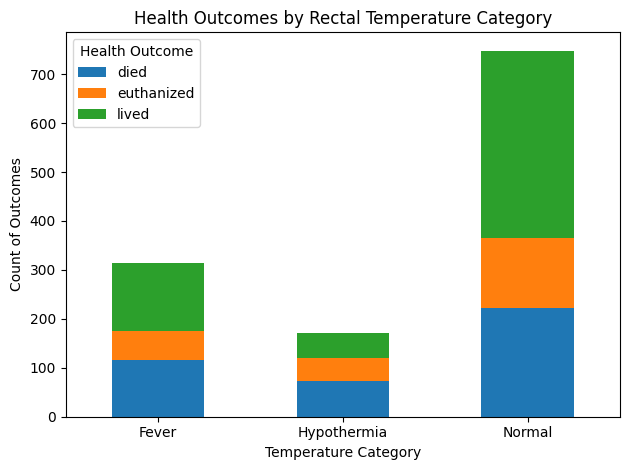

In [11]:
# Define function to categorize rectal temperature
def categorize_temp(temp):
    # TODO: Return the category based on temperature values (use if-elif-else structure).
    if temp<37.5:
        return 'Hypothermia'
    elif temp>=37.5 and temp<=38.5:
        return 'Normal'
    else:
        return 'Fever'

# Apply function to create a new column
df['temp_category'] = df['rectal_temp'].apply(categorize_temp)  # TODO: Choose the appropriate DataFrame method to apply a function.

# Grouping data by temperature category and outcome for plotting
grouped_data = df.groupby(['temp_category', 'outcome']).count()['id'].reset_index()  # TODO: Group by two columns and count a unique identifier.
grouped_data.columns = ['Temperature Category', 'Outcome', 'Count']

# Create a pivot table for visualization
pivot_table = pd.pivot_table(grouped_data, values='Count', index='Temperature Category', columns='Outcome', fill_value=0)  # TODO: Fill the blanks to correctly set up the pivot table parameters.

# Plotting the data
pivot_table.plot(kind='bar', stacked=True)
plt.title('Health Outcomes by Rectal Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Count of Outcomes')
plt.xticks(rotation=0)
plt.legend(title='Health Outcome')
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()



---


### Naive Bayes Assumption and Its Impact

#### Context:
The Naive Bayes classifier, while simple and effective, assumes feature independence which may affect its application in complex datasets like "Predict Horse Health Outcomes."

#### Task:
Evaluate how the Naive Bayes assumption of feature independence affects its performance on a dataset with interdependent features such as surgery, age, pulse, and mucous membrane status.

#### Instructions:
1. **Review the Assumption:** Consider the independence assumption of Naive Bayes.
2. **Assess Potential Impacts:** Reflect on how this assumption might influence the model's effectiveness, especially where features might be interrelated.
3. **Select the Most Accurate Statement:** Choose the statement that best describes Naive Bayes' assumption and its impact on the dataset.

#### Statements:
1. **Naive Bayes treats all features as equally interdependent.** This is suited for datasets with strong feature correlations, potentially making it less effective for independent feature scenarios.
   
2. **Naive Bayes assumes independence among features.** This could pose challenges if features like pulse and mucous membrane status, which may be related, are not truly independent.
   
3. **Naive Bayes expects numerical features to behave like categorical variables.** This might complicate handling datasets with a mix of feature types.
   
4. **Naive Bayes requires features to be independent and may need preprocessing to handle correlations like those between pulse and mucous membrane status.**

#### Question:
Considering the assumption and potential impacts of Naive Bayes on the horse health outcomes dataset, which statement number is most accurate?

#### Options:
A) Statement 1

B) Statement 2

C) Statement 3

D) Statement 4



---

### Analyzing Pain and Euthanasia Decisions

#### Context:
Understanding the decision-making process in veterinary care, particularly euthanasia, can be crucial in managing horse health outcomes. Analyzing how pain levels influence these decisions is particularly significant.

#### Task:
Using Bayes' Theorem, calculate the probability that a horse is euthanized given it experiences severe pain and assess what this indicates about the role of pain in euthanasia decisions.

#### Instructions:
1. **Review Given Probabilities:**
   - P(Severe Pain) = 0.20
   - P(Euthanized) = 0.25
   - P(Severe Pain | Euthanized) = 0.50

2. **Calculate the Probability:** Use Bayes' Theorem to find P(Euthanized | Severe Pain).

3. **Interpret the Result:** Consider what the calculated probability implies about the impact of severe pain on euthanasia decisions.


#### Question:
Based on the calculation using Bayes' Theorem, what is the probability that a horse is euthanized given that it is experiencing severe pain? What does this probability suggest about the impact of severe pain on the decision to euthanize?

#### Options:
A) 0.40

B) 0.50

C) 0.75

D) 0.625


In [13]:
# Given probabilities
P_SeverePain = 0.20
P_Euthanized = 0.25
P_SeverePain_Euthanized = 0.50

# Bayes' Theorem calculation
P_Euthanized_SeverePain = P_SeverePain_Euthanized*P_Euthanized/P_SeverePain  # TODO: Calculate the probability using Bayes' Theorem components given above.
print("Probability of being euthanized given severe pain: {:.3f}".format(P_Euthanized_SeverePain))

Probability of being euthanized given severe pain: 0.625




---

### Evaluating Feature Significance with Chi-square Test

#### Context:
In statistical analysis for data, the Chi-square test of independence is essential for determining the association between features. This test helps identify which features are statistically significant in relation to the outcome variable in a dataset.

#### Task:
Perform a Chi-square test of independence on each Categorical feature against the 'outcome' variable to determine their significance in predicting health outcomes of horses. Given the significance level of 0.05, identify which Categoricalfeature is not significantly associated with the outcome.

#### Instructions:
1. **Perform Chi-square Tests:** Apply the Chi-square test to each Categorical feature against the 'outcome' variable.
2. **Interpret Results:** Evaluate the p-values to determine which Categorical feature(s) fail to show a significant association with the outcome, suggesting they may not be useful for predictive modeling in this context.


#### Question:
Based on a significance level of 0.05, which Categorical feature was found to be not significantly associated with the 'outcome' variable, therefore failing the Chi-square test?

#### Options:
A) temp_of_extremities

B) peripheral_pulse

C) pain

D) All columns passed

In [14]:
cat_cols

['temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'abdomen',
 'abdomo_appearance',
 'rectal_exam_feces']

In [15]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'cp_data',
       'outcome', 'temp_category'],
      dtype='object')

In [19]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,cp_data,outcome,temp_category
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,no,died,Normal
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,no,euthanized,Normal
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,no,lived,Normal
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,yes,lived,Hypothermia
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,yes,lived,Normal


In [27]:
from scipy.stats import chi2_contingency # TODO: Import the necessary function for performing the Chi-square test.
import scipy
threshold = 0.05

print(f'{"Column":<25} | Test result')
print('----------------------------------------')

for column in cat_cols:
    # print(df['outcome'].dtype)
    # df['outcome'] = df['outcome'].astype('category')
    # Create a contingency table
    contingency_table = contingency_table = pd.crosstab(df[column], df['outcome'])  # TODO: Create a contingency table from two categorical columns.
    # print(pd.crosstab(df[column], df['outcome']))

    # Perform the Chi-Square test
    chi2, p, dof, expected_freq = scipy.stats.chi2_contingency(contingency_table)  # TODO: Apply the imported function to compute the Chi-square statistic and p-value.

    print(f'{column:<25} |   ', '\033[32mPassed' if p < threshold else '\033[31mFailed', '\033[0m')
    # print(f"p-value for {column}: {p}")
    # print(f"Chi-square statistic for {column}: {chi2}, p-value: {p}")

Column                    | Test result
----------------------------------------
temp_of_extremities       |    Passed 
peripheral_pulse          |    Passed 
mucous_membrane           |    Passed 
capillary_refill_time     |    Passed 
pain                      |    Passed 
peristalsis               |    Passed 
abdominal_distention      |    Passed 
nasogastric_tube          |    Passed 
nasogastric_reflux        |    Passed 
abdomen                   |    Passed 
abdomo_appearance         |    Passed 
rectal_exam_feces         |    Passed 


---

### Data Preprocessing for Modelling

#### Context:
In preparation for building a Gaussian Naive Bayes model to predict horse health outcomes, the initial step involves preprocessing the dataset. This includes dropping less relevant columns and applying appropriate transformations to the remaining data.

#### Task:
Prepare the data by dropping specified columns and applying transformations suitable for a Gaussian Naive Bayes model.

#### Instructions:
1. **Drop Columns:**
   - Remove the 'id' columns from the dataset.
2. **Apply Transformations:**
   - Use `StandardScaler` to normalize numerical data.
   - Apply `OrdinalEncoder` to encode categorical data that handles unknown values.
3. **Split the Data:**
   - Use `train_test_split` with a `random_state=0` to divide the data into training and test sets, targeting 'outcome' as the label. `test_size = 0.2`

#### Question:
After preprocessing, which categorical feature ends up with the highest number of unique ordinal values?

#### Options:
A) temp_of_extremities

B) pain and mucous_membrane

C) cp_data and abdomen

D) nasogastric_reflux


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder  # TODO: Import necessary preprocessing classes.
from sklearn.compose import ColumnTransformer

# Drop unnecessary columns
df_temp = df.drop(['id'], axis=1)

# Identify numerical and categorical columns
numerical_cols = df_temp.select_dtypes(include=['int', 'float']).columns.tolist()  # TODO: Specify data types to select numerical (int and float both) columns.
categorical_cols = df_temp.select_dtypes(include=['object']).columns.tolist()  # TODO: Specify the data type for categorical(object).

# Remove the target column from the feature lists - This line is no longer needed as 'outcome' is already excluded
# categorical_cols.remove('outcome')

# Prepare target and features
X = df_temp.drop('outcome', axis=1)
y = df_temp['outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # TODO: Use the appropriate function to split the data.

# Create transformers for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # TODO: Choose the correct transformer for numerical data.
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)  # TODO: Choose the correct transformer for categorical data that handles unknown categories.
    ])

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)  # TODO: Fit and Apply the preprocessor to training data.
X_test = preprocessor.transform(X_test)  # TODO: Apply the preprocessor to test data.


# The following print statement is not relevant after transformation and is removed
print(f'{"Column":<25} | Number of unique values')
print('------'*10)
for i in categorical_cols:
    print(f'{i:<25} |   ', f'\033[32m{df[i].unique()}' , '\033[0m')

Column                    | Number of unique values
------------------------------------------------------------
surgery                   |    ['yes' 'no'] 
age                       |    ['adult' 'young'] 
temp_of_extremities       |    ['cool' 'cold' 'normal' 'warm'] 
peripheral_pulse          |    ['reduced' 'normal' 'absent' 'increased'] 
mucous_membrane           |    ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red'] 
capillary_refill_time     |    ['more_3_sec' 'less_3_sec' '3'] 
pain                      |    ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' 'slight'] 
peristalsis               |    ['absent' 'hypomotile' 'normal' 'hypermotile' 'distend_small'] 
abdominal_distention      |    ['slight' 'moderate' 'none' 'severe'] 
nasogastric_tube          |    ['slight' 'none' 'significant'] 
nasogastric_reflux        |    ['less_1_liter' 'more_1_liter' 'none' 'slight'] 
rectal_exam_feces         |    ['decreased' 'absent' 'nor



---

### Bernoulli Naive Bayes Classifier

#### Context:
Evaluating the performance of the Bernoulli Naive Bayes classifier not only through traditional classification metrics but also by analyzing the types of errors made can offer deeper insights into the model's behavior. A confusion matrix is particularly useful for this purpose as it visualizes the performance of an algorithm by showing the actual versus predicted classifications.

#### Task:
Generate a confusion matrix for the Bernoulli Naive Bayes model and analyze which outcome categories are most frequently misclassified.

#### Instructions:
1. **Prepare and Train the Model:**
   - Implement the Bernoulli Naive Bayes classifier and train it on the dataset.
   - Predict the outcomes using the test set.

2. **Generate a Confusion Matrix:**
   - Create a confusion matrix to visualize the model’s predictions against the actual values.

3. **Analyze Misclassifications:**
   - Examine the confusion matrix to determine which category is most frequently misclassified as "Euthanized."

#### Question:
According to the confusion matrix generated from the Bernoulli Naive Bayes model, which category is most frequently incorrectly predicted as "Euthanized"?

#### Options:
A) Died

B) Lived

C) Both 'Died' and 'Lived' are equally misclassified as 'Euthanized'

D) Neither 'Died' nor 'Lived' is misclassified as 'Euthanized'

Bernoulli Naive Bayes Classification Report:
              precision    recall  f1-score   support

        died       0.66      0.78      0.71        89
  euthanized       0.55      0.67      0.60        42
       lived       0.74      0.58      0.65       116

    accuracy                           0.66       247
   macro avg       0.65      0.67      0.65       247
weighted avg       0.68      0.66      0.66       247



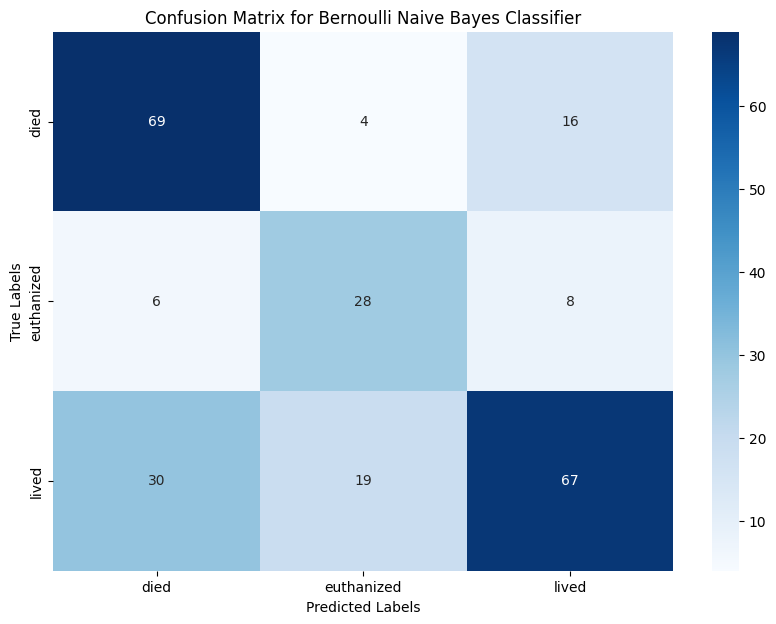

In [35]:
from sklearn.naive_bayes import BernoulliNB  # TODO: Correctly import the Bernoulli Naive Bayes classifier.
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Encoding the 'outcome' variable
# Use LabelEncoder for a more robust encoding of the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# Train Bernoulli Naive Bayes classifier
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train_encoded)  # TODO: Fit the Bernoulli Naive Bayes model using training data.
y_pred_ber = bernoulli_nb.predict(X_test)  # TODO: Predict outcomes using the test set.

print("Bernoulli Naive Bayes Classification Report:")
print(classification_report(y_test_encoded, y_pred_ber, target_names=le.classes_)) # Use encoded y_test and predicted values, and use le.classes_ for target names


# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_ber)  # TODO: Provide the correct variables to generate the confusion matrix.
categories = le.classes_ # Use le.classes_ for category labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Bernoulli Naive Bayes Classifier')
plt.show()



---
# Assesments for Naive Bayes-II




---

### Mucous Membrane Condition

#### Context:
The condition of a horse's mucous membrane can provide valuable insights into its circulatory and respiratory health, which are critical factors in determining the overall health status. Analyzing how different conditions of mucous membranes correlate with health outcomes can help in early diagnosis and management of health issues.

#### Task:
Investigate the relationship between the condition of the mucous membrane and health outcomes in horses.

#### Instructions:
1. **Group Data by Mucous Membrane Condition:** Use the dataset to group entries by 'mucous_membrane' and 'outcome' to analyze the distribution of health outcomes within each mucous membrane condition category.
2. **Visualize and Analyze Data:** Create a bar chart to visualize the count of each health outcome within the different mucous membrane condition categories. This will help identify any significant correlations between mucous membrane condition and health outcomes.

#### Question:
After analyzing the bar chart which depicts the count of health outcomes within each mucous membrane condition category, identify the correct statement regarding the correlation between mucous membrane condition and health outcomes.

#### Options:
A) Horses with normal pink mucous membranes tend to have better health outcomes and higher survival rates.

B) A pale or cyanotic mucous membrane is strongly associated with a higher survival rate.

C) Horses with bright pink mucous membranes are more likely to be euthanized due to severe health issues.

D) The color of the mucous membrane has no correlation with the health outcomes of horses.



In [ ]:
# Grouping data by mucous membrane condition and outcome for plotting
grouped_data = df.____(_______).______()['id'].reset_index()  # TODO: Choose appropriate columns for grouping and a method to summarize the data.
grouped_data.columns = ['Mucous Membrane Condition', 'Outcome', 'Count']

# Create a pivot table for visualization
pivot_table = pd.pivot_table(grouped_data, values=____, index=______, columns=____, fill_value=0)  # TODO: Determine which values will be summarized and how they should be arranged in the pivot table.

# Plotting the data
pivot_table.plot(kind='bar', stacked=True)
plt.title('Health Outcomes by Mucous Membrane Condition')
plt.xlabel('Mucous Membrane Condition')
plt.ylabel('Count of Outcomes')
plt.xticks(rotation=45)
plt.legend(title='Health Outcome')
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()





---



### Training and Evaluating the Gaussian Model

#### Context:
After preprocessing the dataset for the "Predict Health Outcomes of Horses" and training a Gaussian Naive Bayes model, the next step is to evaluate the classifier’s performance. This involves encoding the target variable and analyzing the model's ability to predict each category.

#### Task:
Train and evaluate the Gaussian Naive Bayes classifier using the preprocessed features and encoded target. Use the classification report to identify which category the model has difficulty predicting.

#### Instructions:
1. **Encode the Target Variable:**
   - Map the 'outcome' categories to numeric values using the provided dictionary.
2. **Model Training:**
   - Train the Gaussian Naive Bayes classifier using the encoded training data.
3. **Model Evaluation:**
   - Evaluate the classifier's performance using the classification report to identify which category is most problematic.

#### Question:
Which category does the Gaussian Naive Bayes model struggle with the most, according to the classification report?

#### Options:
A) Died

B) Euthanized

C) Lived

D) All categories have nearly identical recall

In [ ]:
from sklearn.______ import GaussianNB  # TODO: Import the Gaussian Naive Bayes classifier.
from sklearn._____ import classification_report, confusion_matrix  # TODO: Import necessary functions for evaluation.

# Encoding the 'outcome' variable
outcome_map = {'died': 0, 'euthanized': 1, 'lived': 2}
y_train_encoded = y_train.___(outcome_map)  # TODO: Apply the mapping to the 'y_train' series.
y_test_encoded = y_test.____(outcome_map)  # TODO: Apply the mapping to the 'y_test' series.

# Initialize and train Gaussian Naive Bayes classifier
model = GaussianNB()
model.____(X_train, _____)  # TODO: Fit the model using the training data.

# Predict on the test set
y_pred = model.____(X_test)  # TODO: Make predictions using the test data.

# Generate the classification report
report = classification_report(_____, ____, target_names=['Died', 'Euthanized', 'Lived'])  # TODO: Provide the correct variables to generate the classification report.
print(report)



---


### Cross-Validation with Gaussian

#### Context:
Cross-validation is a robust technique for assessing the generalizability of a predictive model beyond the specific data used during training. Using 5-fold cross-validation with the Gaussian Naive Bayes classifier provides insight into the model's performance across different subsets of the dataset.

#### Task:
Apply 5-fold cross-validation using the Gaussian Naive Bayes Classifier on the "Predict Health Outcomes of Horses" dataset, utilizing the 'f1_weighted' scoring metric to evaluate the model's performance.

#### Instructions:
1. **Set Up Cross-Validation:**
   - Use the Gaussian Naive Bayes classifier.
   - Implement 5-fold cross-validation.
   - Apply the 'f1_weighted' metric to measure model performance across folds.

2. **Calculate the Average Score:**
   - Determine the average 'f1_weighted' score across all cross-validation folds to assess the overall effectiveness of the model.

#### Question:
1. What is the average 'f1_weighted' score value using 5-fold cross-validation with the Gaussian Naive Bayes Classifier?
2. Is this 'f1_weighted' score higher or lower than the F1 score from the previously generated classification report for the category the model struggled with the most?

#### Options:
A) Mean F1 score: 0.5, Higher

B) Mean F1 score: 0.6, Higher

C) Mean F1 score: 0.7, Lower

D) Mean F1 score: 0.8, Lower

In [ ]:
from sklearn._____ import cross_val_score  # TODO: Import the function to perform cross-validation.

# Perform 5-fold cross-validation using 'f1_weighted' as the scoring metric
# Review the scoring parameters available in the documentation to ensure correct usage. https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
cv_scores = cross_val_score(_____, X_train, ____, ___=5, scoring='f1_weighted')  # TODO: Initialize the classifier, set the number of folds, and specify the scoring metric.

# Calculate the average of the cross-validation scores
average_cv_score = cv_scores.____()  # TODO: Determine the appropriate method to calculate the mean of the scores.
print(f"Average F1 weighted score across 5 folds: {average_cv_score:.2f}")



---

### Multinomial Naive Bayes Evaluation

#### Context:
After training a Gaussian Naive Bayes model on the "Predict Health Outcomes of Horses" dataset and obtaining its performance metrics, the next step involves evaluating a Multinomial Naive Bayes model. This evaluation will use the same dataset, but the continuous features will be scaled to `non-negative` values suitable for Multinomial Naive Bayes.

#### Task:
Evaluate the performance of the Multinomial Naive Bayes classifier after scaling the features to ensure all are non-negative, as required by the model.

#### Instructions:
1. **Data Preparation:**
   - Scale the continuous features using `MinMaxScaler` to ensure all feature values are non-negative.
   
2. **Model Training and Evaluation:**
   - Train a Multinomial Naive Bayes classifier on the scaled data.
   - Generate a classification report to assess the model's performance across different outcome categories.

#### Question:
Based on the classification report for the Multinomial Naive Bayes model, which category has the highest recall, indicating the best performance in correctly identifying true positive cases?

#### Options:
A) Died

B) Euthanized

C) Lived

D) All categories have nearly identical recall


In [ ]:
from sklearn.____ import MultinomialNB  # TODO: Correctly import the Multinomial Naive Bayes classifier.
from sklearn.____ import MinMaxScaler  # TODO: Correctly import the MinMaxScaler for data normalization.

# Initialize MinMaxScaler
scaler = _____()  # TODO: Instantiate the scaler.

# Scale X_train and X_test
X_train_scaled = scaler._____(X_train)  # TODO: Fir and Apply the scaler to train data.
X_test_scaled = scaler._____(X_test)  # TODO: Apply the scaler to test data.

# Train Multinomial Naive Bayes classifier
multinomial_nb = MultinomialNB()
multinomial_nb.____(X_train_scaled, _____)  # TODO: Fit the Multinomial Naive Bayes model to the scaled training data.
y_pred_multinomial = multinomial_nb._____(____)  # TODO: Predict the test set results with the trained model.

print("Multinomial Naive Bayes Classification Report:")
print(classification_report(______, _____, target_names=['Died', 'Euthanized', 'Lived']))  # TODO: Provide the correct arguments to generate the classification report.



---

### Optimizing Laplace Smoothing for Gaussian Naive Bayes Classifier

#### Context:
Laplace smoothing is a technique used to handle the issue of zero probability in Naive Bayes classifiers. While typically more relevant for discrete data in Multinomial and Bernoulli Naive Bayes, experimenting with this parameter in Gaussian Naive Bayes can provide insights into its effect on model robustness, particularly when handling datasets with sparse features or small sample sizes.

#### Task:
Determine the best Laplace smoothing parameter (alpha) for a Gaussian Naive Bayes classifier applied to the "Predict Health Outcomes of Horses" dataset. This involves tuning the alpha parameter to improve model performance, especially in handling data with potential zero-frequency issues.

#### Instructions:
1. **Setup Parameter Tuning:**
   - Use a range of alpha values to determine which provides the best balance between bias and variance.
   - Apply cross-validation to evaluate each model configuration under different alpha settings.

2. **Evaluate Model Performance:**
   - Measure the performance 'f1_weighted' of the Gaussian Naive Bayes classifier for each alpha setting.
   - Identify the alpha value that results in the highest average performance across cross-validation folds.

3. **Implement and Discuss Results:**
   - Implement the model using the optimal alpha.
   - Discuss how Laplace smoothing impacts the performance of a Gaussian Naive Bayes classifier.

#### Question:
After tuning the Laplace smoothing parameter for the Gaussian Naive Bayes model on the "Predict Health Outcomes of Horses" dataset, which alpha value resulted in the highest f1_weighted score?

#### Options:
A) Alpha = 0.0, Accuracy = 65%

B) Alpha = 0.8, Accuracy = 64%

C) Alpha = 0.5, Accuracy = 75%

D) Alpha = 0.3, Accuracy = 53%


In [ ]:
from sklearn.____ import GridSearchCV  # TODO: Import the necessary class for optimizing hyperparameters.
import numpy as np

# Define a range of alpha values to test
alpha_range = np.linspace(0.0, 1.0, 11)

# Setup GridSearchCV to find the best alpha
param_grid = {'_____': alpha_range}  # TODO: Specify the parameter name for Laplace smoothing in GaussianNB.
gnb = GaussianNB()
clf = GridSearchCV(____, param_grid, ___=5, ____='f1_weighted')  # TODO: Fill in the GridSearchCV constructor with the correct model and parameters.
clf.____(X_train, y_train)  # TODO: Fit the GridSearchCV to the training data.

# Best alpha and its score
best_alpha = clf.best_params_[_____]  # TODO: Extract the best alpha value from clf.
best_score = clf.best_score_  # TODO: Extract the best score from clf.
print(f"Best alpha: {best_alpha}")
print(f"Best scoring f1_weighted: {best_score:.2f}")



---

### Match the Following attributes

#### Context:
Understanding how different Naive Bayes classifiers calculate feature importance is crucial for interpreting model outcomes and for feature selection. Each classifier type has specific methods or attributes that help in identifying the contribution of each feature towards making a prediction.

#### Task:
Match the following Naive Bayes models to the correct method or attribute used for determining feature importance, which provides insights such as $( P(x_i \mid y) $) or the mean of each feature per class. Use the [scikit-learn documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) to find the parameters that return these values.

#### Instructions:
1. **Research**: Look into the scikit-learn documentation for Naive Bayes classifiers to identify the specific attributes associated with each model.
2. **Match**: Connect each model listed on the left with its corresponding method or attribute on the right that is used to determine feature importance.

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<title>Match the Following Characteristics</title>
<style>
  .matching-table {
    width: 100%;
    border-collapse: collapse;
  }
  
  .matching-table th,
  .matching-table td {
    border: 1px solid black;
    padding: 5px;
    text-align: left;
  }
  
  .matching-table th {
    background-color: #f2f2f2;
  }
</style>
</head>
<body>

<table class="matching-table">
  <tr>
    <th>Models</th>
    <th>Characteristics</th>
  </tr>
  <tr>
    <td>A. Gaussian Naive Bayes
</td>
    <td>I. feature_log_prob_</td>
  </tr>
  <tr>
    <td>B. Multinomial Naive Bayes</td>
    <td>II. feature_importances_</td>
  </tr>  
	<tr>
    <td>C. Bernoulli Naive Bayes</td>
    <td>III. epsilon_</td>
  </tr>
  <tr>
    <td></td>
    <td>IV:  theta_</td>
  </tr>
</table>

</body>
</html>

#### Options:
- A) A-I, B-III, C-II

- B) A-IV, B-I, C-I

- C) A-IV, B-I, C-II

- D) A-I, B-IV, C-I






---

### Evaluating Feature Importance in Gaussian Naive Bayes Model

#### Context:
Understanding which features most influence the predictions of a Gaussian Naive Bayes classifier can enhance interpretability and guide further model refinement. This model evaluates feature importance based on the mean values of features conditioned on each class, reflecting the significance of each feature in class discrimination.

#### Task:
Analyze feature importance in a Gaussian Naive Bayes model trained on a dataset, using the mean of each feature across classes to determine their impact on the model's predictions.

#### Instructions:
1. **Model Setup and Training:**
   - Initialize the Gaussian Naive Bayes model with `var_smoothing` set to 0.3 to stabilize the calculation by adjusting the variance of each feature.
   - Train the model using the training sets `X_train` and `y_train`.

2. **Feature Importance Calculation:**
   - Extract the mean of each feature for each class from the model. These means are critical as Gaussian Naive Bayes assumes features are normally distributed, and the mean of these distributions plays a significant role in class separation.
   - Calculate the `absolute` values of these means to focus on the magnitude of feature values irrespective of their direction.

3. **Summarize Feature Importance:**
   - Aggregate these mean values across all classes to get a single importance score per feature.
   - Rank these features based on their importance scores to identify the most influential features.

4. **Visualization:**
   - Plot these importance scores using a horizontal bar chart to visually compare the significance of each feature.


#### Question:
After implementing the above steps, which features were identified as the most important based on the mean absolute values of the class conditional distributions?

#### Options:
A) rectal_temp, age, peristalsis

B) lesion_2, pain, cp_data

C) nasogastric_reflux, nasogastric_tube, rectal_exam_feces

D) total_protein, lesion_1, temp_category


In [ ]:
# Train the Gaussian Naive Bayes model
model = GaussianNB(______ = 0.3) # TODO: Set the smoothing parameter to 0.3.
model.fit(X_train, y_train)

# TODO: Use the appropriate numpy function to calculate the absolute values of the means
feature_importances = np.___(model._____)   # TODO: Access the attribute that stores the class conditional means.

# Create a DataFrame to view these importances
importance_df = pd.DataFrame(feature_importances, columns=X.columns)

# Summing the importances across classes to get an overall importance score for each feature
importance_df.loc['Mean Importance'] = importance_df.____(axis=0)  # TODO: Aggregate the means to get a single importance score per feature
sorted_importance = importance_df.loc['Mean Importance']._______(ascending=False)   # TODO: Sort the features based on importance

print("Feature Importance based on absolute means of class conditional distributions:")
print(sorted_importance)

# Optionally, visualize these importances
import matplotlib.pyplot as plt
sorted_importance.plot(kind='barh')
plt.title('Feature Importance in Gaussian Naive Bayes')
plt.ylabel('Features')
plt.xlabel('Importance (mean absolute values across classes)')
plt.show()